In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange (start=0, stop=1, step=0.01)
y = 0.7 * X + 0.3

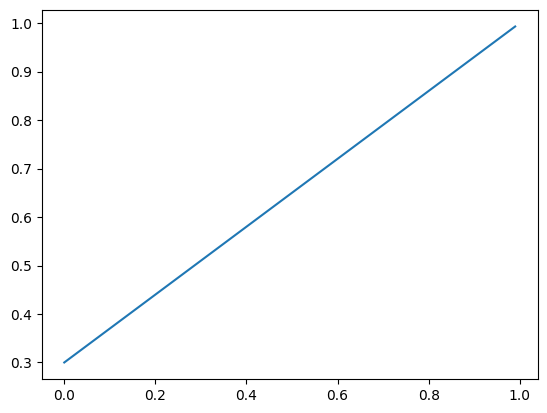

In [5]:
plt.plot (X, y)

In [7]:
X = np.expand_dims (X, axis=0)
X.shape

(1, 100)

In [8]:
X = np.transpose (X)

In [9]:
X.shape

(100, 1)

In [10]:
y.shape

(100,)

In [11]:
np.random.seed (0)

class Model:
    def __init__ (self, inputLayer, outputLayer):
        self.weights = np.random.randn(1)
        self.bias = np.zeros ((1, 1))

    def linear (self, X):
        self.output = self.weights * X + self.bias
        return self.output

In [12]:
model = Model (100, 1)

In [13]:
y_pred = model.linear (X)

In [15]:
y_pred[0:5]

array([[0.        ],
       [0.01764052],
       [0.03528105],
       [0.05292157],
       [0.07056209]])

In [26]:
y_pred = np.squeeze (y_pred)
y_pred[0:5]

array([0.        , 0.01764052, 0.03528105, 0.05292157, 0.07056209])

In [27]:
y[0:5]

array([0.3  , 0.307, 0.314, 0.321, 0.328])

### Mean Absolute Error

In [28]:
error = y_pred - y

In [29]:
error_abs = np.abs (error)

In [30]:
mae = np.mean (error_abs)

In [31]:
print (f'Raw implementation of MAE is : {mae}')

Raw implementation of MAE is : 0.3143048607614194


### MAE in torch

In [32]:
import torch
from torch.nn import L1Loss

mae = L1Loss ()

torchTrue = torch.Tensor (y)
torchPred = torch.Tensor (y_pred)

loss = mae (torchTrue, torchPred)
loss

tensor(0.3143)

### MAE in TensorFlow

In [33]:
import tensorflow as tf
from tensorflow.keras.losses import MeanAbsoluteError

In [34]:
mae_tf = MeanAbsoluteError ()
loss_tf = mae_tf (y, y_pred)
loss_tf

<tf.Tensor: shape=(), dtype=float32, numpy=0.31430486>

## Classification

In [35]:
data = np.random.randn (10)
y = np.where (data<0, 0, 1)

In [37]:
data

array([ 0.40015721,  0.97873798,  2.2408932 ,  1.86755799, -0.97727788,
        0.95008842, -0.15135721, -0.10321885,  0.4105985 ,  0.14404357])

In [38]:
y

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [39]:
def sigmoid (z):
    return (1 / (1 + np.exp (-z)))

predicted_value = [sigmoid (i) for i in data]
predicted_value = np.array (predicted_value)

In [40]:
predicted_value

array([0.59872543, 0.72685773, 0.9038621 , 0.86617546, 0.27343225,
       0.72113296, 0.46223277, 0.47421817, 0.60123138, 0.53594876])

In [48]:
def logLoss (y_pred, y_true):
    return -(y_true * np.log (y_pred) + (1-y_true) * np.log (1-y_pred)).mean ()

In [49]:
loss = logLoss (predicted_value, y)

In [50]:
loss

0.41187687702138015

In [51]:
from torch.nn import BCELoss

torchOutput = torch.Tensor (predicted_value)
torch_y = torch.Tensor (y)

torchLoss = BCELoss ()
torch_output = torchLoss (torchOutput, torch_y)
torch_output

tensor(0.4119)

In [52]:
from tensorflow.keras.losses import BinaryCrossentropy
bcetf = BinaryCrossentropy ()
tf_val = bcetf (y_true=y, y_pred=predicted_value)

In [53]:
tf_val

<tf.Tensor: shape=(), dtype=float32, numpy=0.41187686>

### Softmax and Categorical Cross Entropy

In [55]:
np.random.seed (42)

X_data = np.random.randn (1, 10)
y_data = np.zeros ((1, 10), dtype=int)

print (f'X : {X_data}')
print (f'y : {y_data}')

X : [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]]
y : [[0 0 0 0 0 0 0 0 0 0]]


In [57]:
maxim = np.argmax (X_data)
for _ in range (len (X_data)):
    y_data[_][maxim] = 1

In [58]:
print (f'y after operation : {y_data}')

y after operation : [[0 0 0 0 0 0 1 0 0 0]]


In [59]:
def softmax (x):
    return np.exp (x) / np.exp (x).sum ()

In [60]:
y_pred = softmax (X_data)
y_pred

array([[0.08239222, 0.0436635 , 0.09581943, 0.22993732, 0.03967112,
        0.03967177, 0.24322568, 0.10800868, 0.03135277, 0.0862575 ]])

In [61]:
np.argmax (y_pred)

6

In [63]:
np.argmax (y_data)

6

In [64]:
def cce (true_label, pred_label):
    lcce = - np.sum (true_label * np.log (pred_label))
    return lcce

In [65]:
loss = cce (y_data, y_pred)
loss

1.4137655531672622

In [66]:
from tensorflow.keras.losses import CategoricalCrossentropy
lcce_tf = CategoricalCrossentropy ()
lcce_tf (y_data, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.4137655>

In [70]:
from torch.nn import CrossEntropyLoss

lcce_torch = CrossEntropyLoss ()

torch_true = torch.Tensor (X_data)
torch_pred = torch.Tensor (y_data)

lcce_torch (torch_true, torch_pred)

tensor(1.4138)